# Fish market
### Database of common fish species for fish market
This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

Data link : https://www.kaggle.com/aungpyaeap/fish-market

This data has been analysed and modeled by **Md. Mahmudul Hasan Riyad**.



In [1]:
# Calling necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

C:\Users\Riyad\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("F:\\datasets\\Fish data\\fish.csv")

## Exploring Data

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


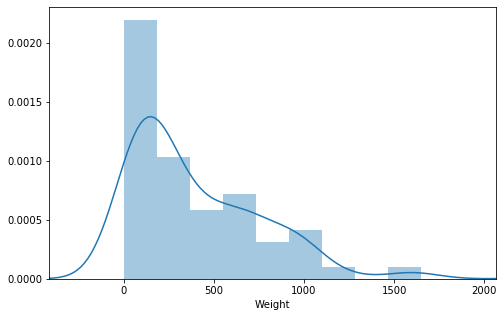

In [7]:
plt.figure(figsize = (8,5))
ax = sns.distplot(data['Weight'], kde = True)
ax.margins(x= 0)


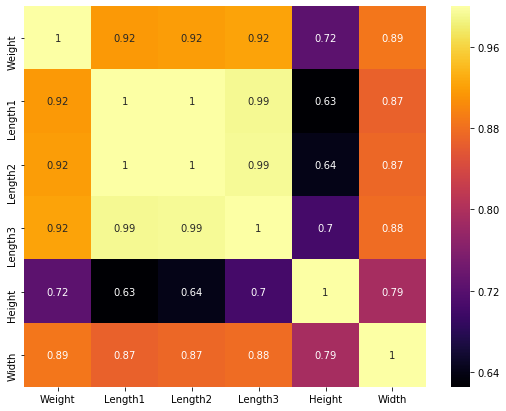

In [8]:
correlation = data.corr()
plt.figure(figsize = (9,7))
sns.heatmap(correlation, cmap = 'inferno', annot = True)

The features in the data is highly correlated to each other

In [9]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [10]:
correlation['Weight']

Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
Name: Weight, dtype: float64

### Scaling the data 

In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data.iloc[:, 1:] = scale.fit_transform(data.iloc[:, 1:])

### Rearranging and Spliting the data into Independent and Dependent features

In [12]:
data = data[['Species','Length1','Length2','Length3','Height','Width','Weight']]
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

### Encoding data

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X= np.array(ct.fit_transform(X))


In [14]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -0.10602023,
         0.59657867, -0.23652895],
       [ 1.        ,  0.        ,  0.        , ..., -0.00233668,
         0.82126055, -0.06657895],
       [ 1.        ,  0.        ,  0.        , ..., -0.01097698,
         0.79734129,  0.16579317],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.50574813,
        -1.56668655, -1.88140219],
       [ 0.        ,  0.        ,  0.        , ..., -1.38478399,
        -1.42724336, -1.39856804],
       [ 0.        ,  0.        ,  0.        , ..., -1.29838103,
        -1.41334117, -1.51043989]])

### Spliting data into training and testing data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [16]:
def display_scores(y_test, y_pred):
    mse_loss = mean_squared_error(y_test, y_pred)
    mae_loss = mean_absolute_error(y_test, y_pred)
    rmse_loss = np.sqrt(mean_absolute_error(y_test, y_pred))
    print('Maean Squared Error = ', mse_loss)
    print("Mean Absolute Error = ", mae_loss)
    print("Root Mean Squared Error = ", rmse_loss)

## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred_lin = lin_reg.predict(X_test)

In [19]:
display_scores(y_test, y_pred_lin)

Maean Squared Error =  0.052940491664053554
Mean Absolute Error =  0.1783790816381008
Root Mean Squared Error =  0.4223494780843239


In [20]:
from sklearn.metrics import r2_score
print('r2 score:',r2_score(y_test,y_pred_lin))

r2 score: 0.9482958230393606


Text(0, 0.5, 'True values')

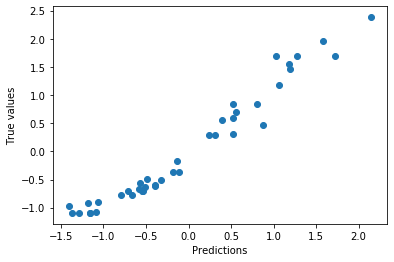

In [21]:
plt.scatter(y_pred_lin, y_test)
plt.xlabel('Predictions')
plt.ylabel('True values')

In [22]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

0.009743999584228355
[-0.11224795  0.28359658  0.05930039 -1.04055694 -0.00862592  0.81291934
  0.0056145  -1.93853573  2.16862658  1.05869913 -0.11583186  0.02094641]


## Polynomial Regression 

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = True)
X_poly = poly_features.fit_transform(X_train)

In [24]:
from sklearn.linear_model import LinearRegression
plin_reg = LinearRegression()
plin_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred_plin = plin_reg.predict(poly_features.fit_transform(X_test))

In [26]:
display_scores(y_test, y_pred_plin)

Maean Squared Error =  0.04304923553720138
Mean Absolute Error =  0.15580107203745544
Root Mean Squared Error =  0.39471644510642756


In [27]:
print('r2 score:',r2_score(y_test,y_pred_plin))

r2 score: 0.9579560895210378


In [28]:
print(plin_reg.intercept_)
print(plin_reg.coef_)

3603353122344.9644
[-3.60335312e+12  7.90498034e-01  4.04165609e-01 -1.88937501e-01
  5.97961609e-01 -4.47441868e-01 -7.25128869e-01 -4.31117014e-01
 -1.21103089e+00  2.34275686e+00 -8.37138935e-01  3.65022091e-01
  2.81166327e-01  7.90498034e-01  4.65030792e-13 -1.02148845e-12
 -3.17690318e-13  8.42742542e-13  5.21957477e-13  4.55691040e-13
 -2.98767011e+00  1.72481721e+01 -1.33073949e+01 -3.58550844e+00
  1.60181313e+00  4.04165609e-01  1.71418435e-13 -1.78967952e-13
  3.61044528e-13 -2.22488694e-13 -2.58459920e-13 -1.37854703e+01
  2.85480245e+01 -1.45027761e+01 -2.83492049e+00  2.26597936e+00
 -1.88937501e-01  6.39488462e-14 -6.21724894e-15  9.14823772e-14
  4.17443857e-14  2.56121174e+00 -7.58723021e+00  4.23778373e+00
  2.21863591e+00 -8.55573390e-01  5.97961609e-01  7.10542736e-15
  0.00000000e+00 -1.77635684e-15  1.03290248e+01 -2.96602171e+01
  1.89242316e+01  3.04042270e+00 -1.53431144e+00 -4.47441868e-01
  0.00000000e+00  0.00000000e+00  9.86561045e-01 -1.23780479e+00
  1.37

Text(0, 0.5, 'True values')

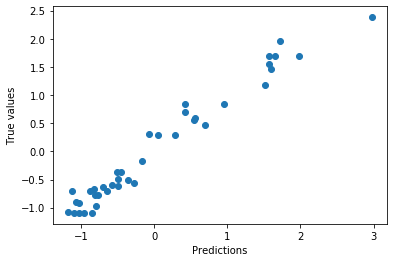

In [29]:
plt.scatter(y_pred_plin, y_test)
plt.xlabel('Predictions')
plt.ylabel('True values')

## Support Vector Regression

In [30]:
from sklearn.svm import SVR
svr_reg = SVR(C = 1.0, epsilon = 0.2)
svr_reg.fit(X_train, y_train)

C:\Users\Riyad\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred_svr = svr_reg.predict(X_test)

In [32]:
display_scores(y_test, y_pred_svr)

Maean Squared Error =  0.03142971096817951
Mean Absolute Error =  0.13761199376835465
Root Mean Squared Error =  0.3709609059838444


In [33]:
print('r2 score:',r2_score(y_test,y_pred_svr))

r2 score: 0.9693042643420725


In [34]:
print(svr_reg.intercept_)


[0.75624336]


Text(0, 0.5, 'True values')

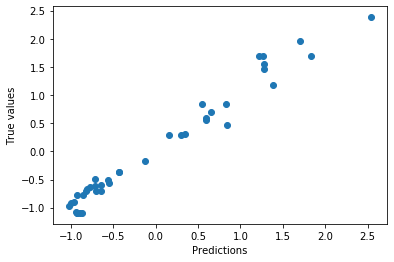

In [35]:
plt.scatter(y_pred_svr, y_test)
plt.xlabel('Predictions')
plt.ylabel('True values')

## Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(min_samples_leaf =1, random_state = 42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [37]:
y_pred_tree = tree_reg.predict(X_test)

In [38]:
display_scores(y_test, y_pred_tree)

Maean Squared Error =  0.03903147747517119
Mean Absolute Error =  0.12003381779485911
Root Mean Squared Error =  0.34645896985770064


In [ ]:
plt.scatter(y_pred_plin, y_test)
plt.xlabel('Predictions')
plt.ylabel('True values')

## Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
rnd_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [40]:
y_pred_rnd = rnd_reg.predict(X_test)

In [41]:
display_scores(y_test, y_pred_rnd)

Maean Squared Error =  0.02775970879099694
Mean Absolute Error =  0.1101435440612534
Root Mean Squared Error =  0.331878809298294


## Impact Learning

In [42]:
from ImpactLearning import Regressor
il_reg = Regressor()
il_reg.fit(X_train,y_train, loss_function="MAE", optimizer = "GD",)
il_reg.train(epochs= 20000, lr=0.03, progress_per=100)

Epoch: 100, loss: 0.332691 
Epoch: 200, loss: 0.304668 
Epoch: 300, loss: 0.282221 
Epoch: 400, loss: 0.265348 
Epoch: 500, loss: 0.250194 
Epoch: 600, loss: 0.238290 
Epoch: 700, loss: 0.228216 
Epoch: 800, loss: 0.221477 
Epoch: 900, loss: 0.215526 
Epoch: 1000, loss: 0.210972 
Epoch: 1100, loss: 0.208385 
Epoch: 1200, loss: 0.206815 
Epoch: 1300, loss: 0.205436 
Epoch: 1400, loss: 0.204026 
Epoch: 1500, loss: 0.202578 
Epoch: 1600, loss: 0.201088 
Epoch: 1700, loss: 0.199553 
Epoch: 1800, loss: 0.197978 
Epoch: 1900, loss: 0.196388 
Epoch: 2000, loss: 0.194820 
Epoch: 2100, loss: 0.193312 
Epoch: 2200, loss: 0.192532 
Epoch: 2300, loss: 0.191752 
Epoch: 2400, loss: 0.191103 
Epoch: 2500, loss: 0.190436 
Epoch: 2600, loss: 0.189964 
Epoch: 2700, loss: 0.189765 
Epoch: 2800, loss: 0.189578 
Epoch: 2900, loss: 0.189340 
Epoch: 3000, loss: 0.189142 
Epoch: 3100, loss: 0.188968 
Epoch: 3200, loss: 0.188754 
Epoch: 3300, loss: 0.188587 
Epoch: 3400, loss: 0.188470 
Epoch: 3500, loss: 0.18

In [43]:
y_pred_il = il_reg.predict(X_test)

In [44]:
display_scores(y_test, y_pred_il)

Maean Squared Error =  0.04785068684315573
Mean Absolute Error =  0.1462718266024742
Root Mean Squared Error =  0.3824549994476137


##### Learning Curve

In [59]:
x_axis = np.arange(200, 20000, 200)

In [60]:
score = il_reg.getLossValues()
se_score = []
score = [se_score.append(score[x_axis[x]]) for x in range(len(x_axis))]

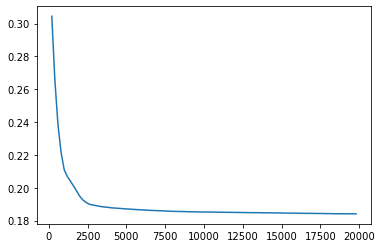

In [62]:
plt.plot(x_axis, se_score)